<a href="https://colab.research.google.com/github/madguy007/Play-Store-App-Review-Analysis-EDA/blob/main/EDA_Playstore_app_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Playstore App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


#**Project Summary**

This project focuses on analysing Android applications available on the Google Play Store to understand different factors that influence app performance and user engagement. The dataset provided includes detailed information about each app, such as its name, category, rating, number of reviews, installs, size, price, content rating, and update history. Along with this, a second dataset contains user reviews with translated text, sentiment labels, polarity scores, and subjectivity levels.

The objective of the project is to explore, clean, and analyse these datasets to identify patterns, behaviours, and relationships among various app attributes. The analysis involves performing data preprocessing, handling missing or inconsistent values, visualising key trends, comparing app categories, and studying sentiment distribution from user reviews. Overall, the project aims to understand how different features contribute to app visibility, user interest, and engagement on the Play Store.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


With millions of apps available on the Google Play Store, developers face intense competition to attract users, maintain high ratings, and achieve strong engagement. However, the factors that influence an app’s success—such as category, pricing model, size, ratings, reviews, and user sentiment—are not always clear.

This project aims to analyse Play Store app data and user reviews to identify patterns, behaviours, and relationships that affect app visibility, user engagement, and overall performance. By examining quantitative attributes (ratings, installs, reviews) alongside qualitative sentiment data, the goal is to understand what characteristics contribute to a successful app and provide a data-driven foundation for decision-making in app development and marketing.

#### **Define Your Business Objective?**

To analyse Play Store app attributes and user reviews to identify the key factors that drive app success, user engagement, and market demand. The goal is to provide data-driven insights that help developers choose profitable categories, improve app quality, and make informed product and marketing decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [58]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

### Dataset Loading

In [59]:
# Load Dataset
playstore_data= pd.read_csv('/content/Play Store Data.csv')
reviews_data = pd.read_csv('/content/User Reviews.csv')

### Dataset First View

In [60]:
# Playstore Dataset First Look
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [61]:
# Playstore Dataset First Look from end
playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [62]:
# Reviews Dataset First Look
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [63]:
# Reviews Dataset First Look from end
reviews_data.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [64]:
#Playstore Dataset Rows & Columns count
playstore_data.shape

(10841, 13)

In [65]:
#Reviews Dataset Rows & Columns count
reviews_data.shape

(64295, 5)

### Dataset Information

In [66]:
# Playstore Dataset Info
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [67]:
# Reviews Dataset Info
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [68]:
#Playstore Dataset Duplicate Value Count
playstore_data.duplicated().sum()

np.int64(483)

In [69]:
#Reviews Dataset Duplicate Value Count
reviews_data.duplicated().sum()

np.int64(33616)

As we can see their are many duplicates in playstore as well as Reviews dataset. we need to remove it. why ?


*  Duplicate rows inflate the dataset and give misleading results.
*  Repeated app entries (e.g., “ROBLOX” appearing multiple times) bias visualisations.


*  Duplicate reviews create false trends in sentiment analysis.
*  Removing duplicates ensures clean, consistent, and trustworthy data.

*   It prevents over-counting and incorrect statistical conclusions.


#### Removing Duplicates

In [70]:
#Remove duplicates from playstore data
playstore_data = playstore_data.drop_duplicates()
playstore_data.duplicated().sum()

np.int64(0)

In [71]:
#Remove duplicates from Reviews data
reviews_data = reviews_data.drop_duplicates()
reviews_data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [72]:
# Missing Values/Null Values Count
print(playstore_data.isnull().sum())
print('-----------------------------')
print(reviews_data.isnull().sum())

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
-----------------------------
App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64


<Axes: >

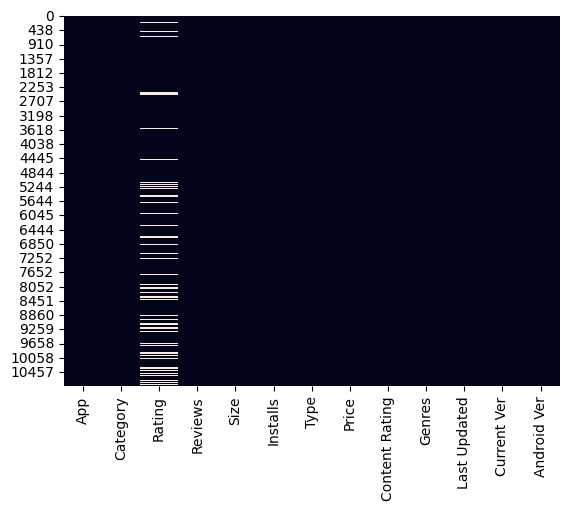

In [73]:
# Visualizing the missing values of playstore dataset
# Checking Null Value by plotting Heatmap
sns.heatmap(playstore_data.isnull(), cbar=False)



*   From the chart, it is clear that most missing values occur in the “Rating” column.



<Axes: >

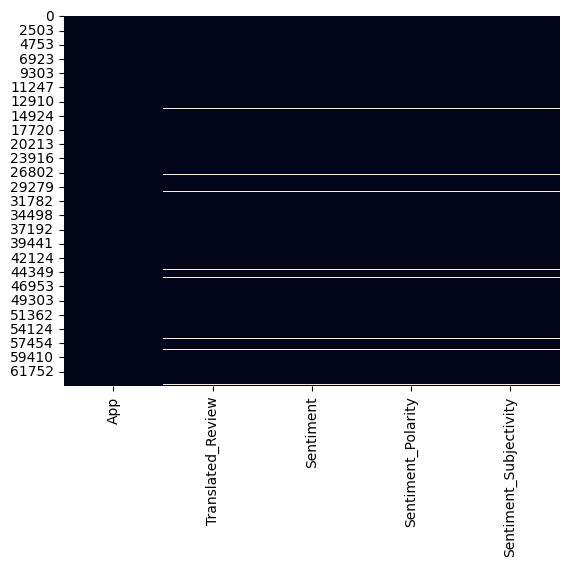

In [74]:
# Visualizing the missing values of Reviews dataset
# Checking Null Value by plotting Heatmap
sns.heatmap(reviews_data.isnull(), cbar=False)



*   Each white line corresponds to a row that contains one or more missing values.

#### Handling Missing Values/Null Values

**Playstore Dataset**                                                                         
Most missing values are in the Rating column.


*   The dataset is small (10k rows)
*   Dropping all missing ratings will remove many apps


*   Rating is important, so we fill it instead

In [75]:
# Fill Rating with median
playstore_data['Rating'] = playstore_data['Rating'].fillna(playstore_data['Rating'].median())

# Drop rows with essential missing categories
playstore_data = playstore_data.dropna(subset=['Type', 'Content Rating','Current Ver'])

# Fill Android Ver missing values
playstore_data['Android Ver'] = playstore_data['Android Ver'].fillna('Unknown')


In [76]:
#Check for missing values in playstore dataset now.
playstore_data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


**Reviews Dataset**

Missing values appear in:


*   Translated_Review
*   Sentiment

A review with missing text or missing sentiment is useless for analysis.

In [77]:
reviews_data = reviews_data.dropna(subset=['Translated_Review', 'Sentiment'])

This will automatically drop all rows where:


*   Polarity is missing
*   Subjectivity is missing

Because they always match sentiment missing rows.

In [78]:
#Check for missing values in Reviews dataset now.
reviews_data.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


### What did you know about your dataset?



1.   reviews_data.tail() shows multiple rows with missing values, especially in the review text and sentiment columns. These incomplete rows cannot contribute meaningful insights and must be handled during cleaning.
2.  playstore_data.info() and reviews_data.info() reveal that some numerical columns are stored as object types, such as Installs, Price, Size, and Android version. These columns must be converted into proper numeric formats for accurate calculations and visual analysis.
3. The duplicate check indicates that both datasets contain repeated rows. Duplicate app entries and duplicate reviews can distort statistics, inflate counts, and lead to incorrect insights, so they need to be removed.
4. The isnull() analysis shows significant missing values, especially in the Rating column of the Play Store data and in the Translated_Review and Sentiment columns of the Reviews dataset. These missing values must be either filled (e.g., median for ratings) or dropped (e.g., missing sentiment rows) based on their importance.


## ***2. Understanding Your Variables***

In [79]:
# playstore Dataset Columns
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [80]:
# Reviews Dataset Columns
reviews_data.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [81]:
# Playstore data summary statistics
playstore_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10348,10348,10348.000000,10348,10348,10348,10348,10348,10348,10348,10348,10348,10348
unique,9650,33,NaN,5999,457,20,2,92,6,119,1376,2831,34
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1939,NaN,591,1525,1487,9585,9585,8374,840,298,1301,2379
mean,NaN,NaN,4.203817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.485696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




*   With summary statistics we got to know that FAMILY is the largest Category in the data.



In [82]:
# reviews data summary statistics
reviews_data.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,29692,29692,29692,29692.000000,29692.000000
unique,865,27994,3,NaN,NaN
top,Facebook,Good,Positive,NaN,NaN
freq,130,137,19015,NaN,NaN
mean,NaN,NaN,NaN,0.188868,0.490930
std,NaN,NaN,NaN,0.355694,0.265976
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.350000
50%,NaN,NaN,NaN,0.157143,0.514286
75%,NaN,NaN,NaN,0.422917,0.652703


### Variables Description

####**📘 Play Store Data – Data Dictionary**
| Column Name    | Description                                                  |
| -------------- | ------------------------------------------------------------ |
| App            | Name of the application                                      |
| Category       | Broad category of the app (e.g., Tools, Productivity, Games) |
| Rating         | Average user rating of the app (0–5 scale)                   |
| Reviews        | Total number of user reviews submitted                       |
| Size           | Size of the app as listed on Play Store (in MB/KB)           |
| Installs       | Number of installs/downloads                                 |
| Type           | Whether the app is Free or Paid                              |
| Price          | Price of the app (if Type = Paid)                            |
| Content Rating | Target age group of the app users                            |
| Genres         | App’s detailed genre/subcategory                             |
| Last Updated   | Date when the app was last updated                           |
| Current Ver    | Current version of the app                                   |
| Android Ver    | Minimum Android version required to run the app              |


####**📙 User Reviews Data – Data Dictionary**
| Column Name            | Description                                             |
| ---------------------- | ------------------------------------------------------- |
| App                    | Name of the application reviewed                        |
| Translated_Review      | User review translated to English                       |
| Sentiment              | Sentiment label (Positive / Neutral / Negative)         |
| Sentiment_Polarity     | Numeric sentiment score (-1 = negative, +1 = positive)  |
| Sentiment_Subjectivity | Measure of subjectivity (0 = objective, 1 = subjective) |


### Check Unique Values for each variable.

In [83]:
# Check Unique Values for each variable in playstore dataset.
for col in playstore_data.columns:
    print(f"{col} → {playstore_data[col].nunique()} unique values")

App → 9650 unique values
Category → 33 unique values
Rating → 39 unique values
Reviews → 5999 unique values
Size → 457 unique values
Installs → 20 unique values
Type → 2 unique values
Price → 92 unique values
Content Rating → 6 unique values
Genres → 119 unique values
Last Updated → 1376 unique values
Current Ver → 2831 unique values
Android Ver → 34 unique values


In [84]:
# Check Unique Values for each variable in reviews dataset.
for col in reviews_data.columns:
    print(f"{col} → {reviews_data[col].nunique()} unique values")

App → 865 unique values
Translated_Review → 27994 unique values
Sentiment → 3 unique values
Sentiment_Polarity → 5410 unique values
Sentiment_Subjectivity → 4474 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code for Playstore Dataset

In [85]:
# Write your code to make your dataset analysis ready.
# Cleaning and converting 'Installs' to numeric
playstore_data['Installs'] = (playstore_data['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int))

In [86]:
# Cleaning and converting 'Price' to numeric
playstore_data['Price'] = (playstore_data['Price'].str.replace('$','',regex=False).astype(float))

In [87]:
# Cleaning and Convering 'Size' like '12M', '1200k' and 'Varies with values' to standard numeric size in MB.
def size_to_mb(x):
  if pd.isna(x):
    return np.nan
  x = x.strip()

  if x == 'Varies with device':
    return np.nan
  # handle values like '12M', '1.2M', '120k', '12345k'
  if x.endswith('M'):
    try:
      return float(x[:-1])
    except:
      return np.nan
  if x.endswith('k'):
    try:
      #convert KB to MB
      return float(x[:-1])/1024
    except:
      return np.nan
  #If already numeric like string direclty convert
  try:
    return float(x)
  except:
    return np.nan

playstore_data['Size_MB'] = playstore_data['Size'].apply(size_to_mb)

In [88]:
#stats for Size of each app in playstore dataset
playstore_data['Size_MB'].describe()

,Size_MB
count,8823.000000
mean,21.302895
std,22.544465
min,0.008301
25%,4.700000
50%,13.000000
75%,29.000000
max,100.000000


In [89]:
#Null values in size column of playstore_data
playstore_data['Size_MB'].isnull().sum()

np.int64(1525)

As we can see the Null values in the Size_MB is 15% of total values. So, leave it as it is.

In [90]:
# convering Reviews to int dtype
playstore_data['Reviews'] = playstore_data['Reviews'].astype(int)

In [91]:
#Dropping "Current_ver" and "Android_ver" because, no Important in app success.
playstore_data.drop(["Current Ver","Android Ver"],axis=1,inplace=True)

In [92]:
#Chekc all features have correct Data types or not for playstore Dataset.
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10348 non-null  object 
 1   Category        10348 non-null  object 
 2   Rating          10348 non-null  float64
 3   Reviews         10348 non-null  int64  
 4   Size            10348 non-null  object 
 5   Installs        10348 non-null  int64  
 6   Type            10348 non-null  object 
 7   Price           10348 non-null  float64
 8   Content Rating  10348 non-null  object 
 9   Genres          10348 non-null  object 
 10  Last Updated    10348 non-null  object 
 11  Size_MB         8823 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.0+ MB


####Data Wrangling Code for Reviews Dataset is not needed. because all the features have correct datatype.

In [93]:
#Chekc all features have correct Data types or not for Reviews Dataset.
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


### What all manipulations have you done and insights you found?

***Data Manipulations Performed***
* Removed duplicate rows from both datasets to ensure clean and unbiased data.

* Handled missing values: filled missing Ratings and dropped rows with missing Type, Content Rating, Current Ver, and incomplete reviews.

* Converted “Installs” to numeric by removing “+” and commas.

* Cleaned “Price” by removing the “$” symbol and converting to float.

* Converted “Size” values (M, k) into a new numeric column Size_MB; set non-convertible values to NaN.

* Converted “Reviews” to integer type for proper analysis.

* Removed irrelevant columns “Current Ver” and “Android Ver” as they offered no analytical value.

* Ensured correct data types across all remaining features.

**Insights Found**
* Rating column had the highest number of missing values and required imputation.

* Size column contained many “Varies with device” entries, explaining ~15% missing after conversion.

* Duplicates existed in both datasets (e.g., repeated App names like ROBLOX).

* Categorical columns showed dominant groups like “FAMILY” (Category), “Everyone” (Content Rating), and “Free” (Type).

* Most apps fall into the “1,000,000+” installs range, indicating high concentration of moderately popular apps.

* Many review rows were incomplete and had to be removed for reliable sentiment analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 | Count Plot - App Category vs App Count

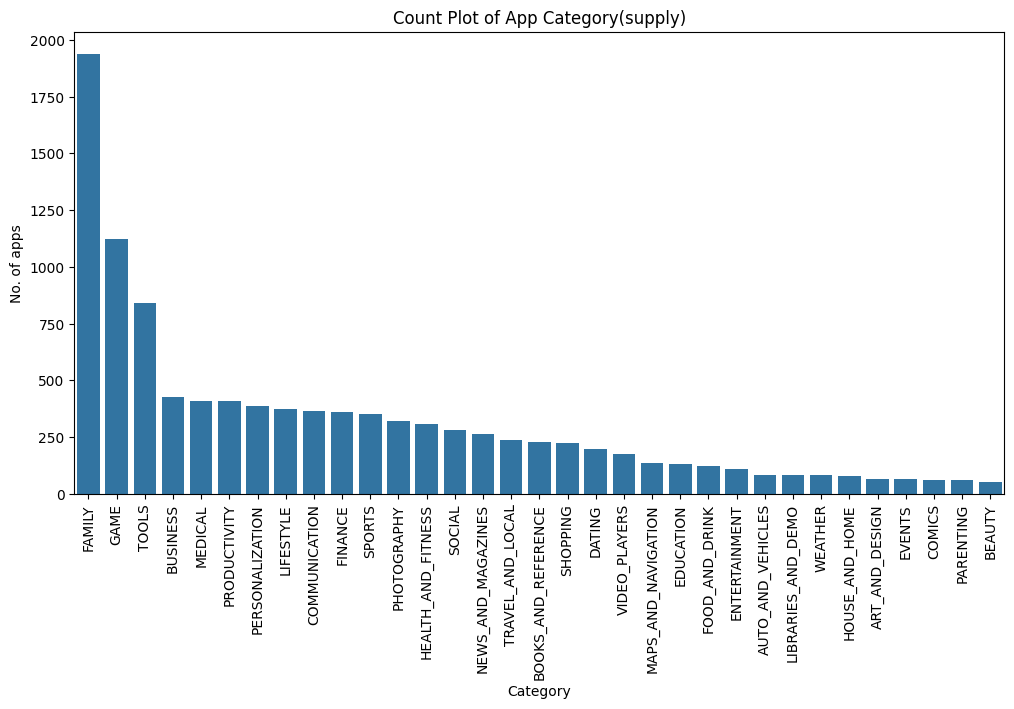

In [94]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=playstore_data,order=playstore_data['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count Plot of App Category(supply)')
plt.ylabel('No. of apps')
plt.xlabel('Category')
plt.show()

##### 1. Why did you pick the specific chart?

* To Identify which Category dominate the app market in playstore.

##### 2. What is/are the insight(s) found from the chart?

* Family category has the highest no. of apps. then, on 2nd place Games category and tools comes on 3rd place.
* Lowest no. of app's categories are Beauty,parenting and comics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes, we can choose that category which  have fewest no. of apps like Beauty, parenting or mid popular app like sports Dating. There is market gap there so, a nicely created app in those categories can conver a good market.
2. We should avoid category like Family,Games and tools because it is already very high competition category.

#### Chart - 2 | Bar plot - Avg Install by App Type

/tmp/ipython-input-3243389436.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




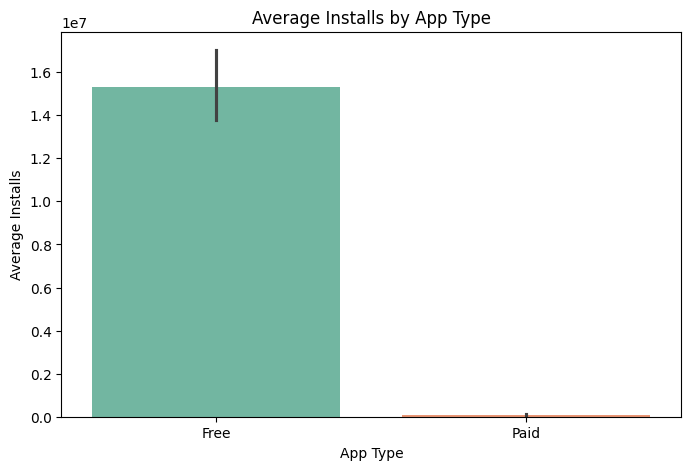

In [95]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
sns.barplot(data=playstore_data, x='Type', y='Installs', estimator=np.mean, palette='Set2')
plt.title('Average Installs by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Installs')
plt.show()

##### 1. Why did you pick the specific chart?

* To Understand free app or paid app which one has highest downloads.
* Type is categorical and Installs is Numerical so, it falls under Bivariate analysis.
* Box plot can also be used here, but it gives overall distribution, which we don't require. we only need mean distribution so bar plot is appropriate.

##### 2. What is/are the insight(s) found from the chart?

* Free apps are Installed heavely more then paid apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes, Helps companies decide pricing strategies
2. Yes, Paid app means less Installs which leads to less reach and overall less user base. so, lauching paid app will be negative growth.

#### Chart - 3 | Line Plot - Rating vs Installs

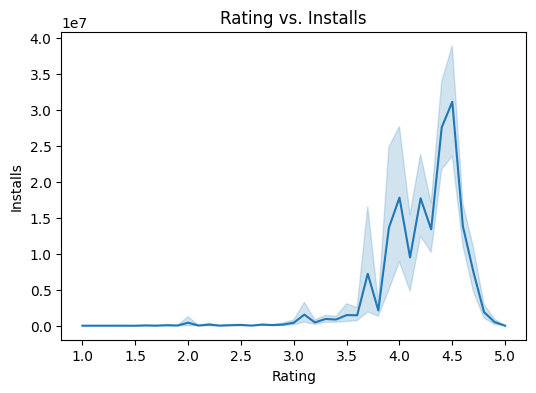

In [96]:
# Chart - 3 visualization code
plt.figure(figsize=(6, 4))
sns.lineplot(data=playstore_data, x='Rating', y='Installs')
plt.title('Rating vs. Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

##### 1. Why did you pick the specific chart?

* Need to know the relationship between Rating and Installs.
* bivariant Analysis of two contineous Numerical features --> Line chart.
* This helps identify how user ratings influence app popularity.

##### 2. What is/are the insight(s) found from the chart?

* Apps with ratings between 4.0 and 4.6 show the highest average installs.

* Apps with ratings below 3.5 consistently have low installs, indicating low user trust.

* Ratings above 4.7 appear to show fewer installs, likely because very few apps achieve this rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Higher ratings strongly correlate with higher installs, meaning improving app quality directly improves user adoption.

2. Apps with ratings below 3.5 require improvement, as they attract very few users.

#### Chart - 4 | Histogram Plot - App Rating

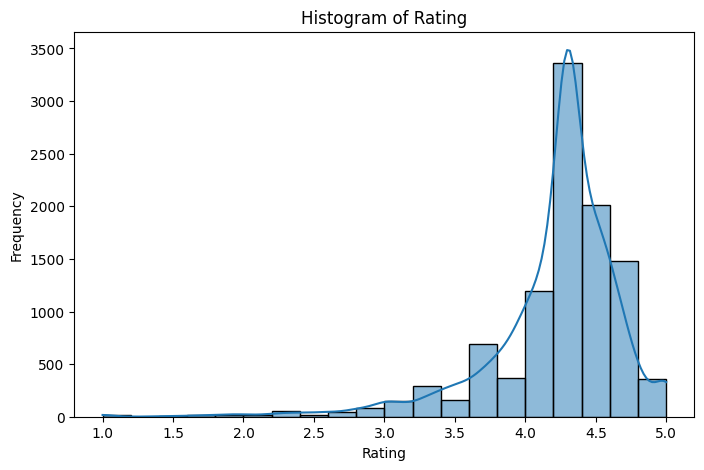

In [97]:
# Chart - 4 visualization code
plt.figure(figsize=(8, 5))
sns.histplot(playstore_data['Rating'], bins=20, kde=True)
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

* To Check normal Rating range of cutomers.
* It visulaize the frequency distribution of Numerical Veribal.

##### 2. What is/are the insight(s) found from the chart?

* Ratings mostly range between 3.5 and 4.5 → users tend to give positive ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. yes, 3.5 to 4.5 is Competitive benchmark for mantaining user trust.
2. No negative growth insights.

#### Chart - 5 | Horizontal Bar Plot - Average Install by App Category

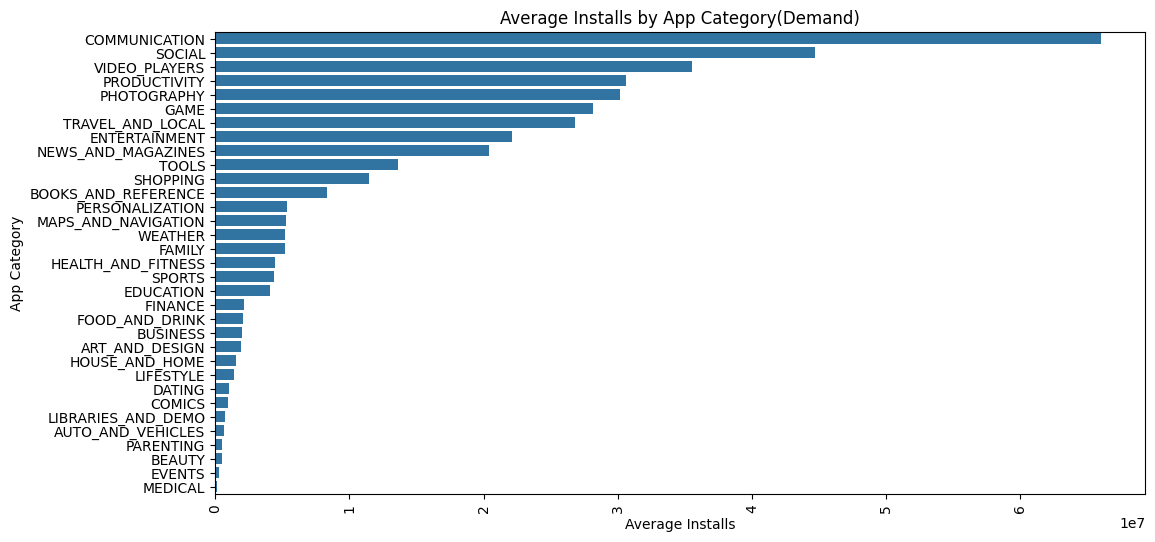

In [98]:
# Chart - 5 visualization code
plt.figure(figsize=(12,6))
category_installs = playstore_data.groupby('Category')['Installs'].mean().sort_values(ascending=False)

sns.barplot(y=category_installs.index, x=category_installs.values)
plt.xticks(rotation=90)
plt.title('Average Installs by App Category(Demand)')
plt.ylabel('App Category')
plt.xlabel('Average Installs')
plt.show()

##### 1. Why did you pick the specific chart?

* It shows the Downlaods by Customer of App Category.

##### 2. What is/are the insight(s) found from the chart?

* communication, Social, Video_players, and Game have the highest installs

* Events, Beauty, and Parenting have low installs

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identify where user demand is strong

* Choose a category with high interest to maximize downloads

#### Chart - 6 |Tree Map - Install Count by Category and Genre

In [99]:
# Chart - 7 visualization code
fig_treemap = px.treemap(playstore_data, path=['Category', 'Genres'], values='Installs',title="Treemap:Install count by Category and Genre",color='Installs')
fig_treemap.show()

##### 1. Why did you pick the specific chart?

* A treemap is ideal for showing hierarchical data.
* How downloads are distributed inside each main category
* Which sub-categories dominate within each segment

##### 2. What is/are the insight(s) found from the chart?

* Games category has the highest diversity and the most sub-categories, showing it is the largest app segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Focus on high-demand sub-categories**

* Companies can target Arcade, Casual, Communication, Social etc., because these segments attract the highest users → higher visibility & growth potential.

2.  **Identify low-competition opportunities**

* Small categories with fewer installs but many subcategories (e.g., Finance, Lifestyle, Parenting) may provide market gaps where, Competition is low and Unique product ideas can stand out.

3. Very small subcategories show signs of weak demand, indicating possible negative growth.


#### Chart - 7 | Bar plot - Sentiment Distribution of User Reviews

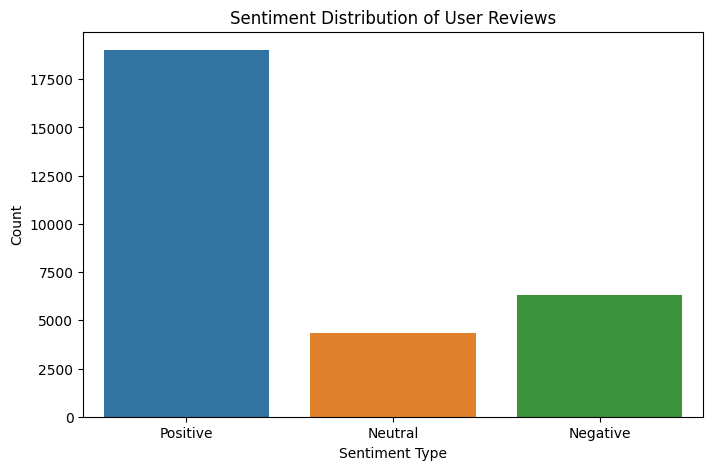

In [100]:
# Chart - 6 visualization code
plt.figure(figsize=(8,5))
sns.countplot(data=reviews_data, x='Sentiment', hue='Sentiment')
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* It tell Sentiment type count for give Apps.

##### 2. What is/are the insight(s) found from the chart?

* The majority of user reviews are Positive, indicating that overall user satisfaction across Play Store apps is high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. This insight helps app developers understand the general user mood.
2. None

#### Chart - 8 | Bubble plot - Sentiment Distribution of User Reviews

In [101]:
# Chart - 8 visualization code
fig = px.scatter(
    playstore_data,
    x="Size_MB",
    y="Installs",
    size="Reviews",
    color="Rating",
    hover_name="App",
    size_max=60,
    title="Bubble Plot: App Size vs Installs (Bubble = Reviews, Color = Rating)",
    labels={"Size_MB": "App Size (MB)", "Installs": "Installs"}
)

fig.update_yaxes(type="log")  # Installs vary widely, log scale helps
fig.show()

##### 1. Why did you pick the specific chart?

* To see the relations between app Size, Install, Reviews and Ratings.

##### 2. What is/are the insight(s) found from the chart?

* Size of the App doesn't affect the Install, review or Rating of the app.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. As UI/UX point of view, App can be made Attractive to Capture audiance without worring about app size impact.
2. None.

#### Chart - 9 | Word Cloud - Problem Focued World cloud from Negative Reviews.

In [102]:
# Creating list of most common APPs Problems.
problem_keywords = [
    'bug','bugs','crash','crashes','crashing','error','issue','issues','problem','problems',
    'slow','loading','load','freeze','freezing','lag','laggy','hang','hanging','stuck',
    'ads','ad','advertisement','glitch','glitches','update','updates','not','working'
]

In [103]:
#Take only 'Negative' Sentiment data from reviews dataset.
neg_reviews = reviews_data[reviews_data['Sentiment'] == 'Negative']

# Combine all negative reviews
all_text = " ".join(str(r).lower() for r in neg_reviews['Translated_Review'].dropna())

# Keep only words from our problem list
filtered_words = " ".join([word for word in all_text.split() if word in problem_keywords])

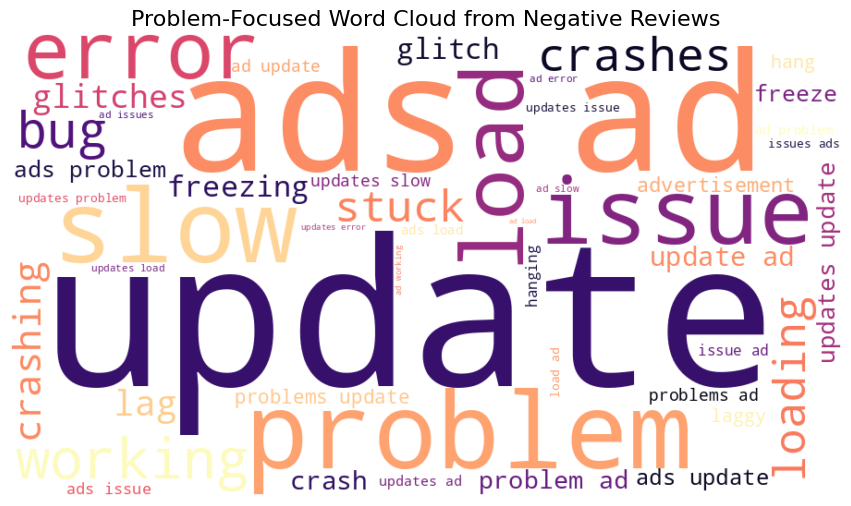

In [104]:
# Chart - 9 visualization code
wordcloud = WordCloud(
    width=900,
    height=500,
    background_color='white',
    colormap='magma'
).generate(filtered_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Problem-Focused Word Cloud from Negative Reviews", fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

* I wanted to show all the negative Words in Translated reviews.

##### 2. What is/are the insight(s) found from the chart?

* Problems occurs in present apps which leads to Customer dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. UI/UX desinger can look at the present problems in the app and can avoid in their product app.
2. the insights indicate risks of negative growth if not addressed

#### Chart - 10 | Bubble plot - Ratings vs Reviews vs Installs

In [105]:
# Chart - 10 visualization code

fig = px.scatter(
    playstore_data,
    x="Rating",
    y="Reviews",
    size="Installs",
    hover_name="App",
    size_max=50,
    title="High Reviews + Moderate Rating Perform Better Than High Rating + Low Reviews",
    labels={"Rating":"App Rating", "Reviews":"Review Count"}
)

fig.update_yaxes(type="log")  # Wide variation → log scale helps
fig.show()

##### 1. Why did you pick the specific chart?

* To show relationship between three continueous numerical values.
* x-app rating,y-reviews, size - Installs.

##### 2. What is/are the insight(s) found from the chart?

1. **Apps with 4.0–4.5 ratings**
* Appear as big bubbles high on the y-axis
* Meaning: High reviews + high installs
* These apps are more used, more trusted, and more successful.

2. **Apps with 4.7–5.0 rating**
* Appear as tiny bubbles with low reviews
* Meaning: High rating but low popularity
* Ratings are inflated due to fewer users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Developers should focus on increasing user engagement (reviews, installs) rather than chasing a perfect rating.
2. Low review volume = low engagement = low growth potential, even if the rating is high.

#### take plot no. 10,9,6,2 , 1-5

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective, the client should focus on optimizing key factors that strongly influence app success. Based on the data insights, the following actions are recommended:

* Target categories with high demand or low competition such as Arcade, Casual, Beauty, Parenting, etc., to maximize visibility and market entry success.

* Prioritize improving app ratings by addressing frequent negative feedback issues like crashes, bugs, slow performance, and poor updates.

* Encourage more user engagement through reviews, feedback prompts, and app improvements, as apps with higher review counts and moderate ratings perform better than perfectly rated apps with low visibility.

* Choose a Free pricing model initially, as free apps attract significantly more installs than paid apps, helping build a strong user base early.

# **Conclusion**

The analysis provides clear strategic direction for app developers and businesses targeting the Play Store market. Free apps are far more effective in acquiring users, making a free-first model the strongest approach for rapid growth. Categories with high demand, such as Game and Family, offer large user bases, while niche categories with fewer apps—like Beauty and Parenting—present profitable opportunities with lower competition.

User sentiment shows that the biggest threats to app performance are crashes, bugs, slow speed, and poor updates. Addressing these issues directly can significantly improve ratings, retention, and installs. Additionally, apps with moderate ratings but high engagement outperform perfectly rated but low-visibility apps, emphasizing the importance of driving user interaction and feedback.

Overall, the business should focus on: selecting the right category, improving app stability, increasing user engagement, and adopting a free pricing strategy to maximize reach and long-term success.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***